### UC-Project

In [13]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

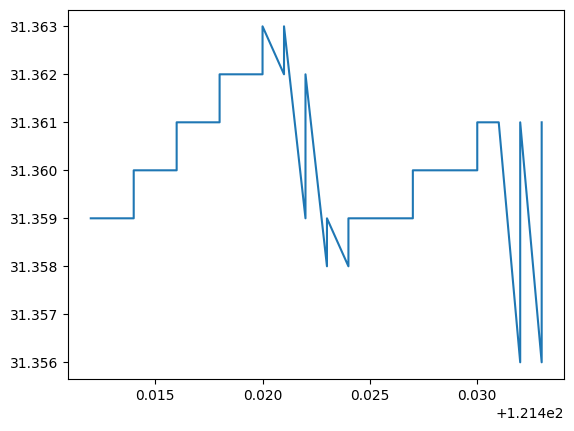

In [2]:
data_raw=pd.read_csv("data\mobike_shanghai_sample_updated.csv")
traj_test=data_raw.loc[15,"track"]

traj_test_parsed=np.array([p.split(',') for p in traj_test.split("#")],dtype=float)

plt.plot(traj_test_parsed[:,0],traj_test_parsed[:,1])

In [3]:
# from leuvenmapmatching.matcher.distance import DistanceMatcher
# from leuvenmapmatching.map.inmem import InMemMap

# map_con = InMemMap("mymap", graph={
#     "A": ((1, 1), ["B", "C", "X"]),
#     "B": ((1, 3), ["A", "C", "D", "K"]),
#     "C": ((2, 2), ["A", "B", "D", "E", "X", "Y"]),
#     "D": ((2, 4), ["B", "C", "F", "E", "K", "L"]),
#     "E": ((3, 3), ["C", "D", "F", "Y"]),
#     "F": ((3, 5), ["D", "E", "L"]),
#     "X": ((2, 0), ["A", "C", "Y"]),
#     "Y": ((3, 1), ["X", "C", "E"]),
#     "K": ((1, 5), ["B", "D", "L"]),
#     "L": ((2, 6), ["K", "D", "F"])
# }, use_latlon=False)

# path = [(0.8, 0.7), (0.9, 0.7), (1.1, 1.0), (1.2, 1.5), (1.2, 1.6), (1.1, 2.0),
#         (1.1, 2.3), (1.3, 2.9), (1.2, 3.1), (1.5, 3.2), (1.8, 3.5), (2.0, 3.7),
#         (2.3, 3.5), (2.4, 3.2), (2.6, 3.1), (2.9, 3.1), (3.0, 3.2),
#         (3.1, 3.8), (3.0, 4.0), (3.1, 4.3), (3.1, 4.6), (3.0, 4.9)]

# matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5, max_lattice_width=5)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

In [4]:
# from leuvenmapmatching import visualization as mmviz
# fig, ax = plt.subplots(1, 1)
# mmviz.plot_map(map_con, matcher=matcher,
#                ax=ax,
#                show_labels=True, show_matching=True, show_graph=True,
#                filename="my_plot.png")

In [5]:
# import networkx as nx
# import osmnx as ox
# ox.config(log_console=True, use_cache=True)

# G = ox.graph_from_place('Shanghai, China', network_type='bike')

In [6]:
# data=G.nodes.data()
# adj_lists=[x.split("#") for x in nx.generate_adjlist(G,delimiter="#")]
# adj_lists=[[int(x) for x in list] for list in adj_lists]
# dict_G={l[0]:((data[l[0]]['x'],data[l[0]]['y']),l[1:]) for l in adj_lists}

In [7]:
path=[tuple(p) for p in traj_test_parsed.tolist()]

In [8]:
# shanghai_map=InMemMap("mymap", graph=G, use_latlon=False)

# matcher = DistanceMatcher(shanghai_map)#, max_dist=2, obs_noise=1, min_prob_norm=0.5, max_lattice_width=5)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

# # from leuvenmapmatching import visualization as mmviz
# # fig, ax = plt.subplots(1, 1)
# # mmviz.plot_map(shanghai_map, matcher=matcher,
# #                ax=ax,
# #                show_labels=True, show_matching=True, show_graph=True,
# #                filename="my_plot.png")

In [17]:
# from leuvenmapmatching.matcher.distance import DistanceMatcher
# from leuvenmapmatching.map.inmem import InMemMap

# import osmnx as ox
# graph = ox.graph_from_place('Leuven, Belgium', network_type='bike', simplify=False)
# graph_proj = ox.project_graph(graph)

# map_con = InMemMap("myosm", use_latlon=True, use_rtree=False, index_edges=True)

# nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
# for nid, row in nodes_proj[['x', 'y']].iterrows():
#     map_con.add_node(nid, (row['x'], row['y']))
# for eid, _ in edges_proj.iterrows():
#     map_con.add_edge(eid[0], eid[1])

# # # Creation of the Leuven Map object from the OSM network
# # map_con = InMemMap("myosm", use_latlon=True, use_rtree=True, index_edges=True)
# # # Add the OSM network into the Leuven Map object
# # nodes_id = list(graph.nodes)
# # for node in nodes_id:
# #     lat = graph.nodes[node]['y']
# #     lon = graph.nodes[node]['x']
# #     map_con.add_node(node, (lat, lon))
# # edges_id = list(graph.edges)
# # for edge in edges_id:
# #     node_a, node_b = edge[0], edge[1]
# #     map_con.add_edge(node_a, node_b)
# #     map_con.add_edge(node_b, node_a)

# # map_con.purge()



# matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[]
Nodes
------
[]

Stats lattice
-------------
nbr levels               : 40
nbr lattice              : 0
avg lattice[level]       : 0.0
min lattice[level]       : 0
max lattice[level]       : 0


In [9]:
# import osmnx as ox
# graph = ox.graph_from_place('Shanghai, China', network_type='drive', simplify=False)
# graph_proj = ox.project_graph(graph)

In [10]:
# from leuvenmapmatching.matcher.distance import DistanceMatcher
# from leuvenmapmatching.map.inmem import InMemMap
# map_con = InMemMap("myosm", use_latlon=True)#, use_rtree=True, index_edges=True)

# # Approach 2
# nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
# nodes_proj = nodes.to_crs("EPSG:3395")
# edges_proj = edges.to_crs("EPSG:3395")
# for nid, row in nodes_proj.iterrows():
#     map_con.add_node(nid, (row['lat'], row['lon']))

In [11]:
# matcher = DistanceMatcher(map_con)
# states, _ = matcher.match(path)
# nodes = matcher.path_pred_onlynodes

# print("States\n------")
# print(states)
# print("Nodes\n------")
# print(nodes)
# print("")
# matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


ValueError: math domain error

In [19]:
import time
from leuvenmapmatching.map.inmem import InMemMap
from leuvenmapmatching.matcher.distance import DistanceMatcher
import osmnx as ox

tic=time.time()
print("Loading map ...")
graph = ox.graph_from_place('Shanghai, China', network_type='drive', simplify=False)
print("Projecting map ...")
graph_proj = ox.project_graph(graph)


Loading map ...
Projecting map ...
Parsing graph ...


Searching closeby nodes with linear search, use an index and set max_dist


Map matching ... 


ValueError: math domain error

In [44]:
print("Parsing graph ...")

nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)


Parsing graph ...


KeyError: 'x'

In [45]:
map_con = InMemMap("myosm", use_latlon=True, use_rtree=False, index_edges=True)

for nid, row in nodes_proj[['lon', 'lat']].iterrows():
    map_con.add_node(nid, (row['lon'], row['lat']))
for eid, _ in edges_proj.iterrows():
    map_con.add_edge(eid[0], eid[1])


In [48]:
from leuvenmapmatching import logger,logging
import sys

print("Map matching ... ")

logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(sys.stdout))

matcher = DistanceMatcher(map_con, max_dist=0.1, obs_noise=1, min_prob_norm=0.5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()


Map matching ... 
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Searching closeby nodes with linear search, use an index and set max_dist
Initialized lattice with 696815 starting points in 20.373728275299072 seconds
Initialized lattice with 696815 starting points in 20.373728275299072 seconds
Initialized lattice with 696815 starting points in 20.373728275299072 seconds
Initialized lattice with 696815 starting points in 20.373728275299072 seconds
Initialized lattice with 696815 starting points in 20.373728275299072 seconds
Initialized lattice with 696815 starting points in 20.373728275299072 seco

KeyboardInterrupt: 

ALL WRONG ALL BAD LET'S SKIP TO THE OTHER PART

.

.

.

.

.

.

C:\Users\osneb\AppData\Local\Temp\ipykernel_15036\2379784597.py:3: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


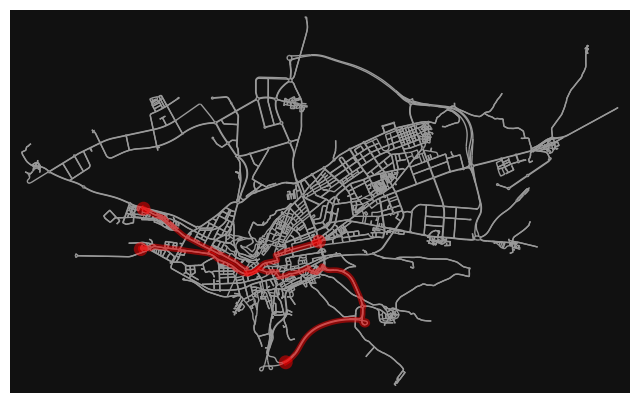

In [4]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)

G = ox.graph_from_place('Burgos, Spain', network_type='drive')
largest_cc = max(nx.strongly_connected_components(G), key=len)
G = G.subgraph(largest_cc)

# pick 4 random nodes as origins/destinations for the 2 routes
orig1 = list(G.nodes())[0]
dest1 = list(G.nodes())[-1]
orig2 = list(G.nodes())[50]
dest2 = list(G.nodes())[-50]

# calculate shortest paths for the 2 routes
route1 = nx.shortest_path(G, orig1, dest1, weight='length')
route2 = nx.shortest_path(G, orig2, dest2, weight='length')

# create route colors
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc = rc1 + rc2
nc = ['r', 'r', 'b', 'b']

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=rc, node_size=0)

In [22]:
def matrix_element_similarity(G,T):
    M=np.zeros((len(T),len(T)))
    G_aux=G.copy()

    for i,track_i in enumerate(T):
        for j,track_j in enumerate(T):
            if i==j:
                continue

            G_aux.add_node("vSource")
            for n in track_i:
                G_aux.add_edge("vSource",n,length=0) #NOT EQUAL TO: n,"vSource" (directed)
            dists=[nx.shortest_path_length(G_aux,"vSource",m) for m in track_j]
            G_aux.remove_node("vSource")

            M[i,j]=sum(dists)/len(track_i)
    return M

In [31]:
def matrix_element_similarity_v2(G,T):
    M=np.zeros((len(T),len(T)))
    G_aux=G.copy()

    for i,track_i in enumerate(T):
        for j,track_j in enumerate(T):
            if i==j:
                continue

            G_aux.add_node("vSource")
            G_aux.add_edges_from(("vSource", n, {'length': 0}) for n in track_i)
            dists=[nx.shortest_path_length(G_aux,"vSource",m) for m in track_j]
            G_aux.remove_node("vSource")

            M[i,j]=sum(dists)/len(track_i)
    return M

In [34]:
#Choose map
G=G

#Generate random paths to test
from random import choice
n_paths=100
T=[]
for i in range(n_paths):
    orig=choice(list(G.nodes()))
    dest=choice(list(G.nodes()))
    T.append(nx.shortest_path(G, orig, dest, weight='length'))

#Compute tha matrix
import time
t0=time.time()
M=matrix_element_similarity(G,T)
t1=time.time()
print("Version 1 takes {:.2f}s".format(t1-t0))
t0=time.time()
M_v2=matrix_element_similarity_v2(G,T)
t1=time.time()
print("Version 1 takes {:.2f}s".format(t1-t0))

Version 1 takes 516.93s
Version 1 takes 317.12s


In [57]:
#K-medoids clustering
from sklearn_extra.cluster import KMedoids

n_clusters=4
kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=0)
kmedoids.fit(M.T) #M.T is not M!! WHICH ONE TO CHOOSE? :((

cluster_labels = kmedoids.labels_
medoid_indices = kmedoids.medoid_indices_

k_corridors=[T[i] for i in medoid_indices]

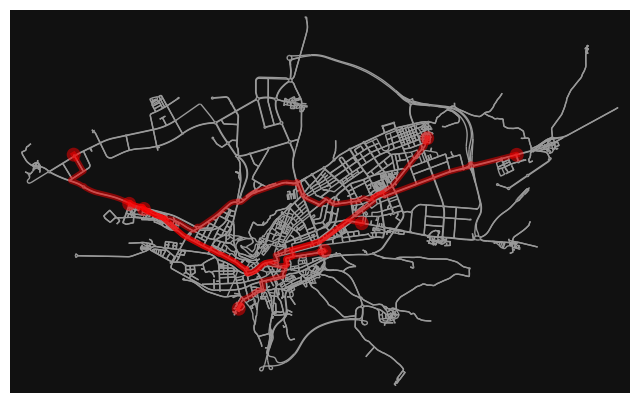

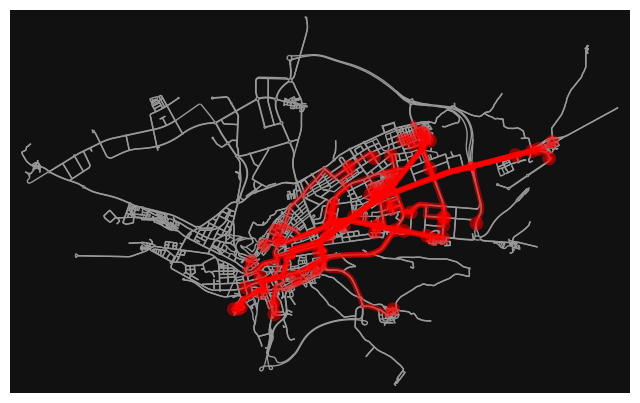

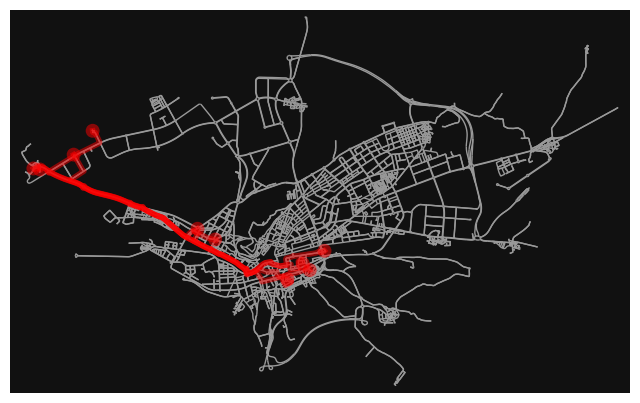

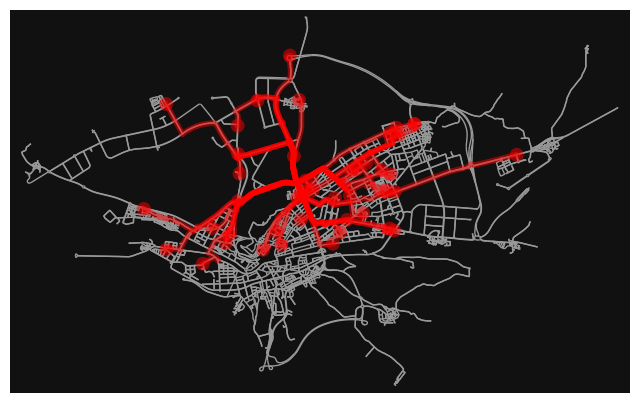

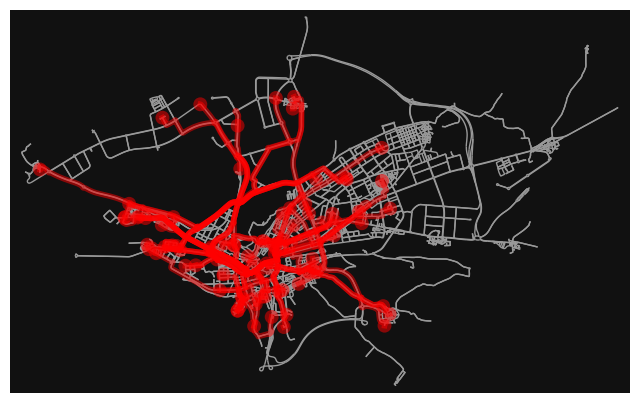

In [58]:
fig, ax = ox.plot_graph_routes(G, k_corridors, route_color='b', node_size=0)

for i in range(n_clusters):
    T_grouped=[]
    for j,label in enumerate(cluster_labels):
        if label==i:
            T_grouped.append(T[j])

    fig, ax = ox.plot_graph_routes(G, T_grouped, route_color='b', node_size=0)
